# Random Forest Binary Classification: 

For assignment 4 we will be working with a credit default data set. The data includes various features around financial history and demographic information. The target variable is "default payment next week", which is just a binary flag of whether a customer defaults on a payment in the next week.

You will need to use the __Random Forest Classifier__ from sklearn in order to build a classifier to predict if a customer is likely to default. You will also need to use the GridSearch CV for this assignment.

# Data Processing:

a) Import the data: The target / y variable is "default payment next month" column. Keep all predictors except for the row column (this is a blank in the .xlsx file). 

b) Remove any rows that have missing data.

c) Split data into train / test set using an 70/30 split.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing
# We'll use this library to make the display pretty
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

In [5]:
credit_df = pd.read_excel("default of credit card clients.xls")

credit_df.replace(["NaN", "NaT"], np.nan, inplace=True)
credit_df = credit_df.dropna(how="any", axis=0)

X_train, X_test, y_train, y_test = train_test_split(
    credit_df.drop(["default payment next month"], axis=1),
    credit_df["default payment next month"], test_size=.30,
    random_state=0)

# Random Forest Classifier - Base Model:

Start by creating a simple Random Forest only using default parameters.

a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.

b) Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

c) Calculate the confusion matrix and classification report (both are in sklearn.metrics). These are the same tools from HW #3.

d) Calculate the roc_auc_score for this model. There are many ways to do this, but an example is to use the probabilities from step B and utilize the roc_auc_score from sklearn.

Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html (Links to an external site.)Links to an external site.

In [7]:
rf_mod_base = RandomForestClassifier().fit(X_train, y_train)
y_test_prob_base = rf_mod_base.predict_proba(X_test)
y_test_pred = rf_mod_base.predict(X_test)

conf_mat = metrics.confusion_matrix(y_true=y_test,
                                    y_pred=y_test_pred)
plt.title('Confusion Matrix')
sns.heatmap(conf_mat, annot=True, fmt="d")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

print(metrics.classification_report(y_test, y_test_pred))

# limit to probability for class = 1
rf_mod_base_probs = rf_mod_base.predict_proba(X_test)[:, 1]

# calculate roc_auc_score
print(f"ROC: {metrics.roc_auc_score(y_test, rf_mod_base_probs)}")

SyntaxError: invalid syntax (<ipython-input-7-047a541bd4b5>, line 19)

# Random Forest Classifier - Grid Search:

Start by creating a simple Random Forest only using default parameters.

a) Use the RandomForestClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following: 

`n_estimators: 500, 750, 1000`
`max_features: 2, 4, 6` 

__Note__: _Feel free to try out more parameters, the above is the bare minimum for this assignment_.

Use 5 cross-fold and for scoring use "roc_auc" (this is the score that will be referenced when identifying the best parameters). 

Example of GridSearchCV: 

create a dictionary of parameters 
`param_grid = {'max_depth':[2, 4, 6, 8],
'min_samples_split':[3,4,5,6,7,8],
'random_state':[0]}`

create Random Forest model 
`rf_obj=RandomForestClassifier()`

Create gridsearch object with various combinations of parameters
`rf_Grid = GridSearchCV(rf_obj, param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)`

Next, just fit this object
Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

b) Identify the best performing model:

* `.best_params_()` : This method outputs to best performing parameters

* `.best_estimator_()` : This method outputs the best performing model, and can be used for predicting on the X_test 

c) Use the best estimator model to predict on test data. Use the `.predict_proba()` and the `.predict()` methods to get predicted probabilities as well as predicted classes.

d) Calculate the confusion matrix and classification report (both are in sklearn.metrics). 

e) Calculate the `roc_auc_score` for this model. 

In [8]:
# create a dictionary of parameters
param_grid = {"n_estimators": [500, 750, 1000], "max_features": [2, 4, 6],
              "random_state": [0]}

# create random forest model
rf_obj = RandomForestClassifier()

# Create gridsearch object with various combinations of parameters
rf_grid = GridSearchCV(rf_obj, param_grid, cv=5, scoring="roc_auc",
                       refit=True, n_jobs=-1)

In [7]:
rf_grid_model_fit = rf_grid.fit(X_train, y_train)
rf_best_model = rf_grid_model_fit.best_estimator_

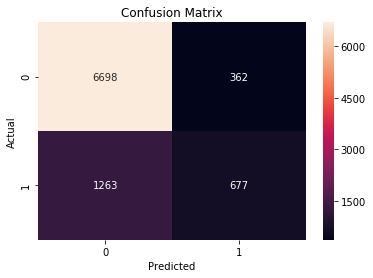

             precision    recall  f1-score   support

          0       0.84      0.95      0.89      7060
          1       0.65      0.35      0.45      1940

avg / total       0.80      0.82      0.80      9000

ROC: 0.7742645877748898


In [8]:
y_test_pred_grid = rf_best_model.predict(X_test)
y_test_probs_grid = rf_best_model.predict_proba(X_test)[:, 1]

conf_mat = metrics.confusion_matrix(y_true=y_test,
                                    y_pred=y_test_pred_grid)
plt.title("Confusion Matrix")
sns.heatmap(conf_mat, annot=True, fmt="d")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

print(metrics.classification_report(y_test, y_test_pred_grid))

# calculate roc_auc_score
print(f"ROC: {metrics.roc_auc_score(y_test, y_test_probs_grid)}")

## What are the best parameters from the Grid Search? Does the Model from \#3 outperform Model \#2? 

In [9]:
print(f"Best parameters: {rf_grid_model_fit.best_params_}")
print(f"Model #2 ROC of {metrics.roc_auc_score(y_test, rf_mod_base_probs)} \nModel #3 ROC of {metrics.roc_auc_score(y_test, y_test_probs_grid)}")

Best parameters: {'max_features': 2, 'n_estimators': 1000, 'random_state': 0}
Model #2 ROC of 0.7249619608072193 
Model #3 ROC of 0.7742645877748898


Model 3 is superior in ROC. Precision, recall, and f1-score are slightly better. 

## Create a feature importance plot for your best performing model. What are the top 5 features for this model? 

In [3]:
importances = rf_best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_best_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking    
headers = ["name", "score"]
values = sorted(zip(X_test.columns, importances), key=lambda x: x[1] * -1)
print(tabulate(values[0:5], headers, tablefmt="plain"))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), indices)
plt.xlim([-1, X_test.shape[1]])
plt.show()

NameError: name 'rf_best_model' is not defined